<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Прямое-кодирование-данных" data-toc-modified-id="Прямое-кодирование-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Прямое кодирование данных</a></span></li><li><span><a href="#Разделение-датафрейма-на-выборки:-тренировочную,-валидационную-и-тестовую---50/25/25" data-toc-modified-id="Разделение-датафрейма-на-выборки:-тренировочную,-валидационную-и-тестовую---50/25/25-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение датафрейма на выборки: тренировочную, валидационную и тестовую - 50/25/25</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression-с-выборкуой-*_up" data-toc-modified-id="LogisticRegression-с-выборкуой-*_up-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression с выборкуой *_up</a></span></li><li><span><a href="#LogisticRegression-с-выборкуой-*_down" data-toc-modified-id="LogisticRegression-с-выборкуой-*_down-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LogisticRegression с выборкуой *_down</a></span></li><li><span><a href="#RandomForestClassifier-с-выборкой-*_up" data-toc-modified-id="RandomForestClassifier-с-выборкой-*_up-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier с выборкой *_up</a></span></li><li><span><a href="#RandomForestClassifier-с-выборкой-*_down" data-toc-modified-id="RandomForestClassifier-с-выборкой-*_down-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestClassifier с выборкой *_down</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></div>

# Отток клиентов

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

Для этого предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем библиотеки, которыми будем пользоваться в процессе работы

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from tqdm import tqdm

Загрузим в пямять функции, которые нам пригодятся

In [41]:
# функция приводит верблюжий регистр к змеиному

def camel_to_snake(stroka, sept='_'):
  r = stroka[0].lower()
  for i in range(1, len(stroka)):
    if stroka[i].isupper() and stroka[i-1] != '_':
      r += sept
    r+=stroka[i]
  return r.lower()


# функция увеличивающая выборку для положительных классов

def upsample(features, target, repeat):
  features_zeros = features[target == 0]
  features_ones = features[target == 1]
  target_zeros = target[target == 0]
  target_ones = target[target == 1]

  features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
  target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
  
  features_upsampled, target_upsampled = shuffle(
      features_upsampled, target_upsampled, random_state=12345)
  
  return features_upsampled, target_upsampled


# функция уменьшающая выборку для отрицательных классов

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

### Анализ данных

Загрузим данные и взглянем на таблицу:

In [42]:
df = pd.read_csv('/datasets/Churn.csv')
pd.options.mode.chained_assignment = None
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Датафрейм:
<li>Названия признаков в верблюжем регистре, сменим на змеиный
<li>Столбец RowNumber дублирует df.index и не несет в себе уникальной информации, дропнем его
<li>Остальные столбцы при первом взгляде корректны.

In [43]:
df.columns = [camel_to_snake(x) for x in df.columns]
df = df.drop('row_number', axis=1)

Посмотрим типы данных признаков и количество пропусков в них

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            9091 non-null   float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


Признак `tenure` имеет около 10% пропусков и в связи с этим тип данных `float64`. В остальных признаках пропусков нет.

Посмотрим распределение значений по таблице

In [45]:
df.describe()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Признак `custorer_id` вероятно не несет в себе полезной информции, его можно проигнорировать.

Остальные признаки содержат корректные значения, вбросов не отмечается.    

Проверим данные на явные дубликаты

In [46]:
df.duplicated().sum()

0

Явных дубликатов нет

In [47]:
df.customer_id.nunique()

10000

Уникальные номера клиентов - все уникальны

In [48]:
print(df.surname.nunique())
df.surname.value_counts().head()

2932


Smith     32
Scott     29
Martin    29
Walker    28
Brown     26
Name: surname, dtype: int64

Среди 10000 клиентов банка встречаются около 3000 разных имён, самые распроcтраненные имена - Smith, Martin, Scott, Walker ...

Никакой особенности в именах на первый взгляд нет, проигнорируем этот признак при обучении модели.

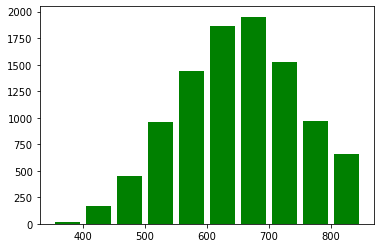

In [49]:
df.credit_score.sort_values().hist(grid=False, rwidth=.8, color='green')
plt.show()


Признак credit_score распределен нормально среди клиентов.

In [50]:
display(df.geography.unique())
df.geography.value_counts()

array(['France', 'Spain', 'Germany'], dtype=object)

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

Все клиенты банка граждане 3х стран. 50% всех клиентов банка - французы. Немцы и испанци распределились равномерно по 25%. Используем прямое кодирование (OHE) для испльзования этого признака в обучающей моделе (вместе с другими категориальными признаками).

In [51]:
display(df.gender.unique())
df.gender.value_counts()

array(['Female', 'Male'], dtype=object)

Male      5457
Female    4543
Name: gender, dtype: int64

По полу клиенты распределились приблизительно одинаково. Мужиков чуть больше. Используем прямое кодирование (OHE) для испльзования этого признака в обучающей моделе (вместе с другими категориальными признаками).

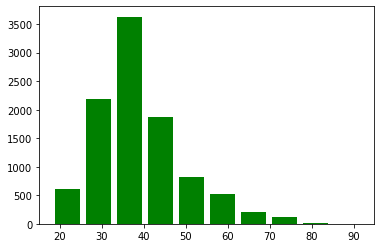

In [52]:
df.age.hist(grid=False, rwidth=.8, color='green')
plt.show()

По возрасту клиенты распределились со смещением вправо, что логично.

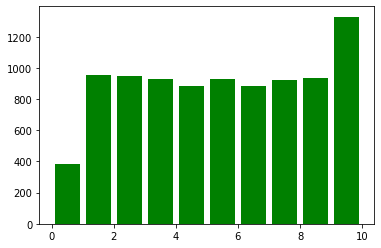

In [53]:
df.tenure.hist(grid=False, rwidth=.8, color='green')
plt.show()

По гистограмме `tenure` отмечается особенность: клиенты не имеют нормального распределения от 1 до 10 лет, распределение смещено влево. Причем выделяются 3 группы клиентов: клиенты первого года, их мало, клиенты 2-9 года (их среднее количество в каждом году) и клиенты 10 года (их больше всего). 

График может говорить о том, что максимальный риск потерять клиента возникает на первом году обслуживания, а минимальный на последнем. 

Т.о. можно разделить всех клиентов на 3 группы: клиенты 1 года, клиенты 2-9 года и клиенты 10 года. Перед этим заполним пропуски медианным значением.

Cоздадим 2 датасета и пройдем двумя путями: 
    <li> датасет с заполненными пропусками - `df1`
    <li> датасет с замененными пропусками на медиану и разбивкой столбца на 3 категории - `df2`

In [54]:
# первый датасет, заменим пропуски рандомным значением от 0 до 10
df1 = df
df1.tenure = df1.tenure.fillna(np.random.randint(0, 10))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [55]:
# второй датасет, заменим пропуски медианой и разделим все данные на 3 категориальные признаки
# в последующем применим прямое кодирование для перевода категориальных признаков в числовые

df2 = df
df2.tenure = df2.tenure.fillna(5)       # mediana 1:10 = 5

def tenure_group(x):
    if x == 1:
        return 'a'
    if 1<x<10:
        return 'b'
    else:
        return 'c'
    
df2['tenure_group'] = df2['tenure'].apply(tenure_group)

Рассмотрим признак `balance`

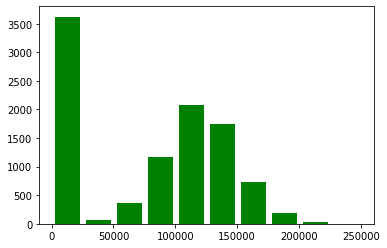

In [56]:
df.balance.hist(grid=False, rwidth=.8, color='green')
plt.show()

По балансам клиенты банка распределились на 2 большие группы: те у кого есть баланс на счете (и они распределены нормально по размеру баланса), и те у кого нет сбережений на счете банка.

Следующая колонка `num_of_products`

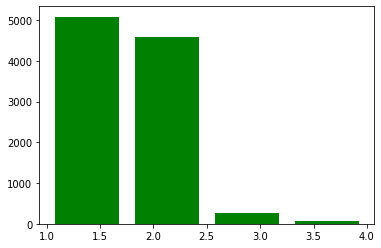

In [57]:
df.num_of_products.hist(grid=False, rwidth=.8, bins=4, color='green')
plt.show()

Максимум клиентов использует лишь 1 продукт банка, далее по количеству используемых продуктов идут пользователи 2-мя продуктами, 3-мя и минимум клиентов используют 4 продукта банка.

In [58]:
df.has_cr_card.value_counts()

1    7055
0    2945
Name: has_cr_card, dtype: int64

У ~ 30% клиентов банка нет кредитной карты

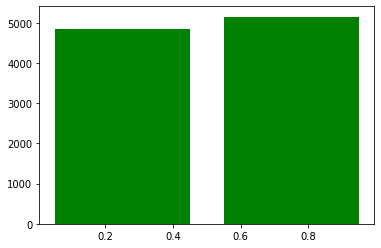

In [59]:
df.is_active_member.hist(grid=False, rwidth=.8, bins=2, color='green')
plt.show()

По активности клиенты распределились примерно одинаково

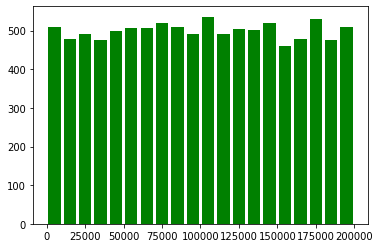

In [60]:
df.estimated_salary.hist(bins=20, rwidth=.8, grid=False, color='green')
plt.show()

По уровню зарплат клиенты распределились равномерно. Скорее всего значения зарплат не сильно повлияет на качество модели. Возможно можно убрать этот признак

In [61]:
df.exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Exited - факт ухода клиента из банка - целевой признак. Отмечается диспаланс в сторону "0" в отношении ~ 1:4

Продолжим предобработку данных: разделим данные на обучающие и целевой признак. В обучающих признаках на первом этапе оставим следующие признаки: `credit_score`, `geography`, `gender`, `age`, `tenure`, `balancs`, `num_of_products`, `has_cr_card`, `is_active_member`, `estimated_salary`. Перед разделением на обучающие признаки и целевой признак, переведём категориальные данные в числа прямым кодированием -  OHE.

### Прямое кодирование данных

In [62]:
# df1 - датасет с "неизмененным" столбцом tenure
df_dummies = pd.get_dummies(df1.drop(['surname', 
                                     'customer_id'], axis=1), drop_first=True)

# опять приведем к змеиному регистру
df_dummies.columns = [camel_to_snake(s) for s in df_dummies.columns]

features1 = df_dummies.drop(['exited'], axis=1)
target1 = df_dummies['exited']


# df2 - датасет где tenure переведен в категориальные признаки
df_dummies = pd.get_dummies(df2.drop(['surname', 
                                     'customer_id', 
                                     'tenure'], axis=1), drop_first=True)

# опять приведем к змеиному регистру
df_dummies.columns = [camel_to_snake(s) for s in df_dummies.columns]

features2 = df_dummies.drop(['exited'], axis=1)
target2 = df_dummies['exited']

### Разделение датафрейма на выборки: тренировочную, валидационную и тестовую - 50/25/25

Разделим данные на тренировочную и валидационную выборки.

In [63]:
# разделим датасет на 3 выборки: тренировочная, валидационная и тестовая в отношении: 50:25:25
features_train1, features_valid_and_test1, target_train1, target_valid_and_test1 = train_test_split(
    features1, target1, test_size=0.4, random_state=12345)

features_valid1, features_test1, target_valid1, target_test1 = train_test_split(
    features_valid_and_test1, target_valid_and_test1, test_size=0.5, random_state=12345)

features_train2, features_valid_and_test2, target_train2, target_valid_and_test2 = train_test_split(
    features2, target2, test_size=0.4, random_state=12345)

features_valid2, features_test2, target_valid2, target_test2 = train_test_split(
    features_valid_and_test2, target_valid_and_test2, test_size=0.5, random_state=12345)

# проверим размеры выборок
print('featurest_train1 = {}'.format(len(features_train1)))
print('target_train1 = {:>7}'.format(len(target_train1)))
print('featurest_valid1 = {}'.format(len(features_valid1)))
print('target_valid1 = {:>7}'.format(len(target_valid1)))
print('featurest_test1 = {:>5}'.format(len(features_test1)))
print('target_test1 = {:>8}'.format(len(target_test1)))
print()
print('featurest_train2 = {}'.format(len(features_train2)))
print('target_train2 = {:>7}'.format(len(target_train2)))
print('featurest_valid2 = {}'.format(len(features_valid2)))
print('target_valid2 = {:>7}'.format(len(target_valid2)))
print('featurest_test2 = {:>5}'.format(len(features_test2)))
print('target_test2 = {:>8}'.format(len(target_test2)))

featurest_train1 = 6000
target_train1 =    6000
featurest_valid1 = 2000
target_valid1 =    2000
featurest_test1 =  2000
target_test1 =     2000

featurest_train2 = 6000
target_train2 =    6000
featurest_valid2 = 2000
target_valid2 =    2000
featurest_test2 =  2000
target_test2 =     2000


Маштабируем следующие признаки:
   * `credit_score`
   * `age`
   * `balance`
   * `num_of_products`
   * `esimated_salary`

In [64]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

numeric1 = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary', 'tenure']
numeric2 = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']

scaler1.fit(features_train1[numeric1])
scaler2.fit(features_train2[numeric2])

features_train1[numeric1] = scaler1.transform(features_train1[numeric1])
features_train2[numeric2] = scaler2.transform(features_train2[numeric2])

features_valid1[numeric1] = scaler1.transform(features_valid1[numeric1])
features_valid2[numeric2] = scaler2.transform(features_valid2[numeric2])

features_test1[numeric1] = scaler1.transform(features_test1[numeric1])
features_test2[numeric2] = scaler2.transform(features_test2[numeric2])

### Вывод:
<big>
    <li>Датафрейм содержит как числовые, так и строковые данные. 
    <li>Пропуски были лишь в одном столбце - tenure. 
    <li>Явных дубликатов не выявлено.
    <li>Вбросов не выявлено.
    <li>Такие колонки как номера строк, идентификатор клиента, имя клиента не несут важной информации и нет смысла их использовать в обучении модели. 
    <li>Другие строковые значения мы изменили на числовые методом прямого кодирования (OHE), добавив новые колонки в таблицу. 
    <li>Перед этим я разбил все данные tenure на 3 категории, чтобы модель точнее учла эту особенность в распределении клиентов по годам пользования услугами банка. 
    <li>Таблица была разделена на обучающие признаки и целевой признак, в дальнейшем эти выборки были разделены на подвыборки: тренировочную, тестовую и валидационную.
    <li>Получилась таблица с числовыми признаками, но они разные по маштабу - для этого они были маштабированы (а точнее те из них, которые не были бинарными). 
    <li>В качестве эксперимента я разбил столбец tenure на подвыборки, посмотрим что из этого выйдет.

## Исследование задачи

### LogisticRegression

Обучим на данных модель логистической регрессии. Оценим её работу метриками `f1` и `ROC_AUC`

In [65]:
# df1
model_lr1 = LogisticRegression(random_state=12345, solver="liblinear")

model_lr1.fit(features_train1, target_train1)

predict1 = model_lr1.predict(features_valid1)

f1 = f1_score(target_valid1, predict1)

roc_auc = roc_auc_score(target_valid1, predict1)

# выведем результаты метрик на экран
print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

f1 =       0.34
ROC_AUC =  0.60


In [66]:
# df2
model_lr2 = LogisticRegression(random_state=12345, solver="liblinear")

model_lr2.fit(features_train2, target_train2)

predict2 = model_lr2.predict(features_valid2)

f1 = f1_score(target_valid2, predict2)

roc_auc = roc_auc_score(target_valid2, predict2)

# выведем результаты метрик на экран
print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

f1 =       0.33
ROC_AUC =  0.59


Чтож, эксперимент не удался, разбиение числового признака `tenure` исходя из свойств гистограммы не увенчалось успехом в моделе с логистической регрессией.

Взглянем на ROC-кривую 

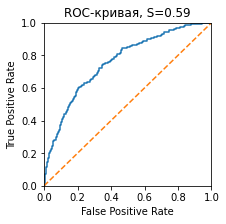

In [67]:
probabilities_valid = model_lr1.predict_proba(features_valid1)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid1, probabilities_one_valid)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, S={:.2f}'.format(roc_auc))
plt.show()

Получились низкие значения метрик и небольшая площадь под ROC-кривой. 

Повторим то же самое для случайного леса

### RandomForestClassifier

In [68]:
model_lr1 =  RandomForestClassifier(random_state=12345, 
                                   criterion='gini',
                                   n_estimators=11,
                                   max_depth=17,
                                   min_samples_split=2,
                                   min_samples_leaf=4)

model_lr1.fit(features_train1, target_train1)

predict1 = model_lr1.predict(features_valid1)

f1 = f1_score(target_valid1, predict1)

roc_auc = roc_auc_score(target_valid1, predict1)

print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

# выведем результаты метрик на экран



f1 =       0.59
ROC_AUC =  0.72


In [69]:
model_lr2 =  RandomForestClassifier(random_state=12345, 
                                   criterion='gini',
                                   n_estimators=11,
                                   max_depth=17,
                                   min_samples_split=2,
                                   min_samples_leaf=4)

model_lr2.fit(features_train2, target_train2)

predict2 = model_lr2.predict(features_valid2)

f1 = f1_score(target_valid2, predict2)

roc_auc = roc_auc_score(target_valid2, predict2)

print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

# выведем результаты метрик на экран

f1 =       0.56
ROC_AUC =  0.70


В моделе случайного леса тоже эксперемент провален)

Взглянем на ROC-кривую


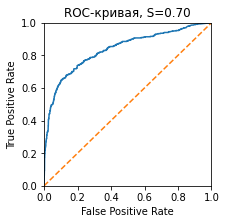

In [70]:
# посмотрим на ROC-кривую
probabilities_valid = model_lr1.predict_proba(features_valid1)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid1, probabilities_one_valid)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, S={:.2f}'.format(roc_auc))
plt.show()

### Вывод:
<big> Модель СлучайногоЛеса показала лучший результат (после подгонки параметров), но значения метрик всё ещё оставляют желать лучшего. Посмотрим как они изменятся после решения вопроса с дисбалансом классов

## Борьба с дисбалансом

Посмотрим насколько сбалансированы классы ключевого признака

In [71]:
features_train = features_train1
target_train = target_train1
features_valid = features_valid1
target_valid = target_valid1
features_test = features_test1
target_test = target_test1

In [72]:
target_train.value_counts(normalize=True)

0    0.800667
1    0.199333
Name: exited, dtype: float64

Класс "0" по частоте относится к классу "1" как 80:20 или 4:1. 

Для того, чтобы сбалансировать классы нужно увеличить количество объектов класса "1" в 4 раза, присоединить к исходным данным и все хорошенько перемешать.

Функция upsample() описана вначале ноутбука

In [73]:
features_train_up, target_train_up = upsample(features_train, target_train, 4) 
print('Баланс классов "0" и "1" с увеличенным количеством объектво класса "1" - \n{}'.format(target_train_up.value_counts()))
print()
features_train_down, target_train_down = downsample(features_train, target_train, 0.25) 
print('Баланс классов "0" и "1" с уменьшенным количеством объектво класса "0" - \n{}'.format(target_train_down.value_counts()))

Баланс классов "0" и "1" с увеличенным количеством объектво класса "1" - 
0    4804
1    4784
Name: exited, dtype: int64

Баланс классов "0" и "1" с уменьшенным количеством объектво класса "0" - 
0    1201
1    1196
Name: exited, dtype: int64


Теперь оба класса сбалансированы, можно тренировать модели

При обучении моделей подключим параметр class_weight='balanced' для балансировки признаков.

### LogisticRegression с выборкуой *_up

In [74]:
model_lr_up = LogisticRegression(random_state=12345, solver="liblinear", class_weight='balanced')

model_lr_up.fit(features_train_up, target_train_up)

predict_up = model_lr_up.predict(features_valid)

f1 = f1_score(target_valid, predict_up)

roc_auc = roc_auc_score(target_valid, predict_up)

print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

f1 =       0.49
ROC_AUC =  0.69


ROC-кривая

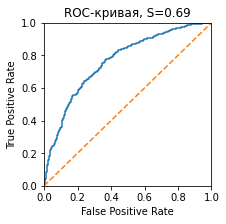

In [75]:
probabilities_valid = model_lr_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=[3,3])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, S={:.2f}'.format(roc_auc))
plt.show()

### LogisticRegression с выборкуой *_down

In [76]:
model_lr_down = LogisticRegression(random_state=12345, solver="liblinear", class_weight='balanced')

model_lr_down.fit(features_train_down, target_train_down)

predict_down = model_lr_down.predict(features_valid)

f1 = f1_score(target_valid, predict_down)

roc_auc = roc_auc_score(target_valid, predict_down)

print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

f1 =       0.49
ROC_AUC =  0.69


Метрики модели увеличились, но еще далеки от достаточных. Используем другую модель обучения - Случайный лес

### RandomForestClassifier с выборкой *_up

In [77]:
model_rf_up = RandomForestClassifier(random_state=12345, 
                                  criterion='entropy',
                                  n_estimators=160,
                                  max_depth=12, 
                                  min_samples_split=4,
                                  min_samples_leaf=4, 
                                  n_jobs=-1,
                                  class_weight='balanced')
model_rf_up.fit(features_train_up, target_train_up)
predict_up = model_rf_up.predict(features_valid)
f1 = f1_score(target_valid, predict_up)
roc_auc = roc_auc_score(target_valid, predict_up)

print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

# подбор параметров проводился в последней ячейке с кодом

f1 =       0.62
ROC_AUC =  0.77


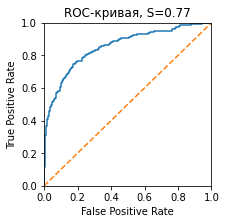

In [78]:
probabilities_valid = model_rf_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=[3,3])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, S={:.2f}'.format(roc_auc))
plt.show()

### RandomForestClassifier с выборкой *_down

In [79]:
model_rf_down = RandomForestClassifier(random_state=12345, 
                                  criterion='entropy',
                                  n_estimators=26,
                                  max_depth=9, 
                                  min_samples_split=2,
                                  min_samples_leaf=3, 
                                  n_jobs=-1,
                                  class_weight='balanced')
model_rf_down.fit(features_train_down, target_train_down)
predict_down = model_rf_down.predict(features_valid)
f1 = f1_score(target_valid, predict_down)
roc_auc = roc_auc_score(target_valid, predict_down)

print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

# подбор параметров проводился в последней ячейке с кодом

f1 =       0.60
ROC_AUC =  0.77


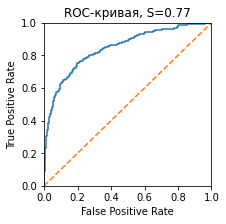

In [80]:
probabilities_valid = model_rf_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=[3,3])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, S={:.2f}'.format(roc_auc))
plt.show()

 ### Вывод: 
 При коррекции баланса классов отмечается улучшение качества модели (увеличение метрик).

## Тестирование модели

Лучший результ показала модель Случайного леса на датасете, где коррекция дисбаланса осуществлялась за счет увеличения количества "1" категорий - model_rf_up. Протестируем её на тестовой выборке

In [81]:
predict = model_rf_up.predict(features_test)
f1 = f1_score(target_test, predict)

probabilities_valid = model_rf_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

roc_auc = roc_auc_score(target_test, probabilities_one_valid)

print('f1 = {:>10.2f}\nROC_AUC = {:>5.2f}'.format(f1, roc_auc))

f1 =       0.61
ROC_AUC =  0.51


ROC-кривая

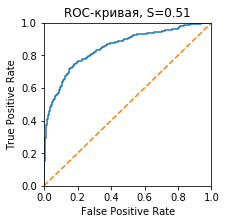

In [42]:
probabilities_valid = model_rf_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure(figsize=[3,3])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, S={:.2f}'.format(roc_auc))
plt.show()

Ячейка для тренировки модели

In [43]:
# %%time
# # функция поиска гиперпараметрbиов RandomForest

# # гиперпараметры
# criterion = ['gini', 'entropy']
# n_estimators=200
# max_depth=15
# min_samples_split = 4    # 1-40 optimum
# min_samples_leaf = 4     # 1-20 optimum


# best_f1 = 0
# best_model = 0
# best_criterion = 0
# bast_max_depth = 0
# best_n_estimators = 0
# best_min_samples_split = 0
# best_min_samples_leaf = 0
# roc_auc = 0


# for n_e in tqdm(range(1, n_estimators)):
#   for m_d in range(1, max_depth):Churn.csv
#     for mss in range(2, min_samples_split):
#       for msl in range(1, min_samples_leaf):
#         for crit in criterion:
#           model = RandomForestClassifier(random_state=12345, 
#                                         n_jobs = -1, 
#                                         criterion = crit, 
#                                         n_estimators=n_e, 
#                                         max_depth=m_d,
#                                         min_samples_split = mss, 
#                                         min_samples_leaf = msl)
#       model.fit(features_train_down, target_train_down)
#       predict = model.predict(features_valid)
#       if best_f1 < f1_score(target_valid, predict):
#         best_f1 = f1_score(target_valid, predict)
#         roc_auc = roc_auc_score(target_valid, predict)
#         best_model = model
#         best_criterion = crit
#         best_n_estimators = n_e
#         bast_max_depth = m_d
#         best_min_samples_split = mss
#         best_min_samples_leaf = msl

# print('\nf1 - {:.2f}\nroc_auc - {:.2f}\nbest_criterion - {}\nbest_n_estimators - {}\nbast_max_depth - {}\nbest_min_samples_split - {}\nbest_min_samples_leaf - {}\n'.format(best_f1,
#                                                                                                                                                                         roc_auc, 
#                                                                                                                                                                         best_criterion, 
#                                                                                                                                                                         best_n_estimators, 
#                                                                                                                                                                         bast_max_depth, 
#                                                                                                                                                                         best_min_samples_split, 
#                                                                                                                                                                         best_min_samples_leaf))





## Выводы:
1. Маштабирование и балансировка классов позволяет увеличить качество модели
2. Прямое кодирование категориальрных признаков позволяет более коретно использовать категориальные признаки при обучении в моделях. При этом, опытным путём установлено, что числовые значения делить на категории не имеет смысла - алгоритму модее виднее))
3. Модель логистической регрессии работает быстрее, но показывает более низкие показатели метрик при прочих равных условиях
4. Случайный лес предсказывает лучше, чем логистическая регрессия, но подбор параметров требует значительного времени